## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

## Carregamento da base de dados

In [2]:
df = pd.read_excel('Tabela IA.xlsx')

In [3]:
df.shape

(39, 4)

In [4]:
for i, column in enumerate(df.columns):
  print(i, column)

0 Idade
1 Sexo
2 Produto
3 Acompanhamento


In [5]:
df.head()

,Idade,Sexo,Produto,Acompanhamento
0,22 anos,Feminino,Pizza,Baré
1,32 anos,Feminino,Hambúrguer,Coca-cola
2,18 anos,Masculino,Pastel,São Geraldo
3,22 anos,Feminino,Pizza,Baré
4,32 anos,Feminino,Hambúrguer,São Geraldo


In [6]:
for i, column in enumerate(df.columns):
  print(i, column)

0 Idade
1 Sexo
2 Produto
3 Acompanhamento


### Valores faltantes

In [7]:
df.isna().sum(axis = 0)

Idade             0
Sexo              0
Produto           0
Acompanhamento    0
dtype: int64

In [8]:
df.isna().sum(axis = 0)

Idade             0
Sexo              0
Produto           0
Acompanhamento    0
dtype: int64

## Inspecionando as estatísticas

In [9]:
def hist_boxplot(feature):
  fig, ax = plt.subplots(1, 2)
  ax[0].hist(feature)
  ax[1].boxplot(feature)

In [10]:
df_describe = df.describe()
df_describe

,Idade,Sexo,Produto,Acompanhamento
count,39,39,39,39
unique,6,4,5,3
top,18 anos,Feminino,Hambúrguer,São Geraldo
freq,13,16,13,14


A informação acima nos mostra que quanto mais disperso, melhor para se criar uma categorização


## Tratamento dos dados para o Hack

In [11]:
df.dtypes

Idade             object
Sexo              object
Produto           object
Acompanhamento    object
dtype: object

In [12]:
df.dtypes[(x not in ['int64', 'float64'] for x in df.dtypes)]

Idade             object
Sexo              object
Produto           object
Acompanhamento    object
dtype: object

## Preparação da base de dados para agrupamento

In [13]:
df.head()

,Idade,Sexo,Produto,Acompanhamento
0,22 anos,Feminino,Pizza,Baré
1,32 anos,Feminino,Hambúrguer,Coca-cola
2,18 anos,Masculino,Pastel,São Geraldo
3,22 anos,Feminino,Pizza,Baré
4,32 anos,Feminino,Hambúrguer,São Geraldo


In [14]:
df_factorized = df.apply(lambda x : pd.factorize(x)[0])
df_label = df.apply(lambda x : tuple(pd.factorize(x)[1]))

## Agrupamento com K-Means

### Escolha do número de clusters com WCSS

In [15]:
wcss = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(df_factorized)
  wcss.append(km.inertia_)

In [16]:
wcss

[157.8461538461539,
 108.03804347826087,
 85.89484126984128,
 69.2012987012987,
 57.69444444444444,
 49.04761904761906,
 40.77500000000002,
 34.247619047619054,
 31.916666666666668,
 28.03333333333333,
 25.75238095238095,
 23.45,
 20.95,
 19.316666666666663]

In [17]:
def optimal_number_of_clusters(wcss):
    from numpy import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

n_clusters_obtained = optimal_number_of_clusters(wcss)
print(n_clusters_obtained,"Clusters para se ter")

8 Clusters para se ter


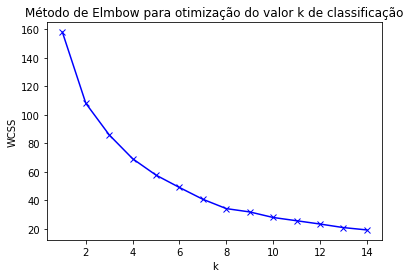

In [18]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Método de Elmbow para otimização do valor k de classificação');

### Redução de dimensionalidade com PCA (Principal Component Analisys)

In [19]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_factorized)

In [20]:
df_pca

array([[-1.88177404,  1.70121741],
       [-0.70702238,  0.16524636],
       [ 0.46772928, -1.3707247 ],
       [-1.7749993 ,  1.24752312],
       [ 1.49784422, -1.52263137],
       [ 0.37904457, -0.15331839],
       [ 0.25930907, -0.34295799],
       [ 1.09396454,  1.17623594],
       [ 0.36095454, -0.91703041],
       [-0.63810962,  0.64192216],
       [ 2.42631369, -1.10046562],
       [ 2.14216951,  1.78804128],
       [-0.37373739, -0.55250263],
       [-1.6484526 , -0.90025328],
       [ 0.22144709,  0.58741211],
       [-1.49085512, -1.64098378],
       [ 0.16549508,  0.75407019],
       [ 0.15253432,  0.1107363 ],
       [-1.88177404,  1.70121741],
       [ 1.69162176, -0.73593784],
       [-1.5287171 , -0.71061368],
       [ 0.15253432,  0.1107363 ],
       [ 3.38583394,  0.72874603],
       [ 1.07587452,  0.41252392],
       [-1.84391206,  0.77084732],
       [-1.49085512, -1.64098378],
       [ 1.40915951, -0.30522506],
       [-0.56238566, -1.21881803],
       [ 0.0078976 ,

In [21]:
df_factorized.shape

(39, 4)

In [22]:
df_factorized.head()

,Idade,Sexo,Produto,Acompanhamento
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,0,1,0,0
4,3,1,3,2


In [23]:
df_pca.shape

(39, 2)

In [24]:
pca.explained_variance_ratio_

array([0.44519415, 0.27350254])

In [25]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]
exp_var

[44.5, 27.4]

- Leva em consideração a coesão e a separação
- Coesão: medida de distância de um ponto para todos os outros pontos do mesmo grupo
- Separação: medida de distância de um ponto com os pontos dos outros clusters
- O coeficiente está no intervalo de [-1, 1]
- O valor -1 indica que o cluster está ruim (registros em grupos "errados")
- O valor 0 indica "indiferença" (em cima da linha de decisão, um cluster ao lado do outro)
- O valor 1 indica que os cluster estão bem distantes

Código baseado na documentação: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Aplicação do k-means

In [26]:
# Retirando a label de saida
df_factorized_dropped = df_factorized.iloc[:,:-1]
df_factorized_dropped

,Idade,Sexo,Produto
0,0,0,0
1,1,1,1
2,2,2,2
3,0,1,0
4,3,1,3
5,2,2,1
6,2,3,0
7,3,1,0
8,2,1,2
9,1,1,1


In [27]:
km = KMeans(n_clusters = n_clusters_obtained, n_init=100, random_state=0)
km.fit(df_factorized_dropped)

KMeans(n_init=100, random_state=0)

In [28]:
print(km.cluster_centers_)

[[3.63636364e-01 1.54545455e+00 1.45454545e+00]
 [3.00000000e+00 1.00000000e+00 0.00000000e+00]
 [4.00000000e+00 2.33333333e+00 1.66666667e+00]
 [1.85714286e+00 2.28571429e+00 4.28571429e-01]
 [2.20000000e+00 1.20000000e+00 1.80000000e+00]
 [0.00000000e+00 5.00000000e-01 0.00000000e+00]
 [3.00000000e+00 1.50000000e+00 3.50000000e+00]
 [2.33333333e+00 2.22044605e-16 6.66666667e-01]]


In [29]:
print(np.unique(km.labels_))

[0 1 2 3 4 5 6 7]


In [30]:
len(km.labels_)

39

## Relacionamento entre os grupos e as posições

In [31]:
groups = km.labels_
position = range(len(groups))
compar = []
for i in range(0, len(position)):
  elem = tuple((position[i], groups[i]))
  compar.append(elem)

In [32]:
df['Grupo gerado por Kmean'] = groups

In [33]:
df

,Idade,Sexo,Produto,Acompanhamento,Grupo gerado por Kmean
0,22 anos,Feminino,Pizza,Baré,5
1,32 anos,Feminino,Hambúrguer,Coca-cola,0
2,18 anos,Masculino,Pastel,São Geraldo,4
3,22 anos,Feminino,Pizza,Baré,5
4,32 anos,Feminino,Hambúrguer,São Geraldo,6
5,18 anos,Masculino,Hambúrguer,Coca-cola,3
6,18 anos,Masculino,Pizza,São Geraldo,3
7,32 anos,Feminino,Pizza,Coca-cola,1
8,18 anos,Feminino,Pastel,São Geraldo,4
9,32 anos,Feminino,Hambúrguer,Baré,0


In [34]:
df.to_excel('table_Preclassified.xlsx', index = False)
import pickle
with open('Kmean.sav','wb') as file:
    pickle.dump(km,file)